<a href="https://colab.research.google.com/github/asfunz-lavoro/Hybrid_AE-SPC/blob/main/Hybrid_AE_SPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
path = 'Missioni_AGV_B.csv'
data = pd.read_csv(path)

# Show features
print("Features of the dataset:")
print(data.columns.tolist())

/tmp/ipykernel_11258/950316409.py:3: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


Features of the dataset:
['Id_Record', 'InsertDateTime', 'IdMissione', 'IdStep', 'Agv', 'TipoMissione', 'Operazione', 'DataOraInizio', 'DataOraFine', 'DurataMissione', 'NodoOrigine', 'NodoDestinazione', 'MacchinaOrigine', 'MacchinaDestinazione', 'DescrizioneOrigine', 'DescrizioneDestinazione', 'CodiceProdotto', 'Scelta', 'TerminataConSuccesso', 'DataOraInserimento', 'TIPO_PALLET', 'TIPO_OCTABIN']


In [ ]:
# Select relevant features for the final model
features_model = ['DataOraInizio', 'DataOraFine', 'DurataMissione', 
                  'NodoOrigine', 'NodoDestinazione', 'DataOraInserimento', 
                  'Operazione']

In [5]:
# Data Cleaning and Preprocessing
## Remove duplicates
data = data.drop_duplicates()
## Handle missing values

### Remove all of those columns that have more than 30% of missing values
threshold = len(data) * 0.7
data = data.dropna(thresh=threshold, axis=1)
### Drop rows with any remaining missing values
data = data.dropna()
## Convert date columns to datetime format
date_columns = ['DataOraInizio', 'DataOraFine', 'DataOraInserimento']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], format='mixed')

In [6]:
# Create a cleaned dataset with only the selected features
data_cleaned = data[features_model].copy()

Summary Statistics:
              IdStep                  DataOraInizio  \
count  369465.000000                         369465   
mean        1.242932  2025-05-02 03:39:23.257942272   
min         1.000000            2025-02-25 14:38:56   
25%         1.000000            2025-04-05 12:16:51   
50%         1.000000            2025-04-19 10:23:28   
75%         1.000000            2025-05-28 09:11:18   
max         3.000000            2025-07-09 12:27:29   
std         0.465428                            NaN   

                         DataOraFine  DurataMissione    NodoOrigine  \
count                         369465   369465.000000  369465.000000   
mean   2025-05-02 03:40:44.304589312       81.514349      95.502364   
min              2025-02-25 14:42:21        0.000000       0.000000   
25%              2025-04-05 12:16:51        0.000000       0.000000   
50%              2025-04-19 10:25:57       52.000000      16.000000   
75%              2025-05-28 09:14:56      129.000000     1

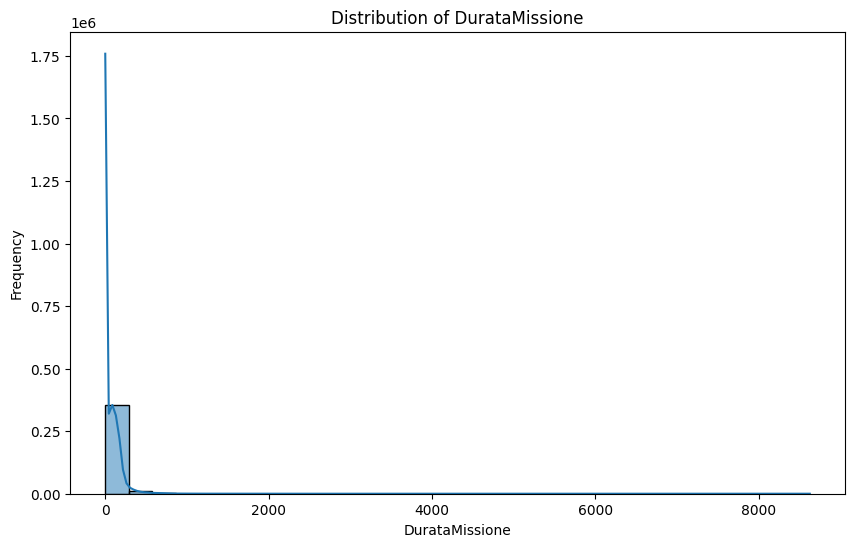

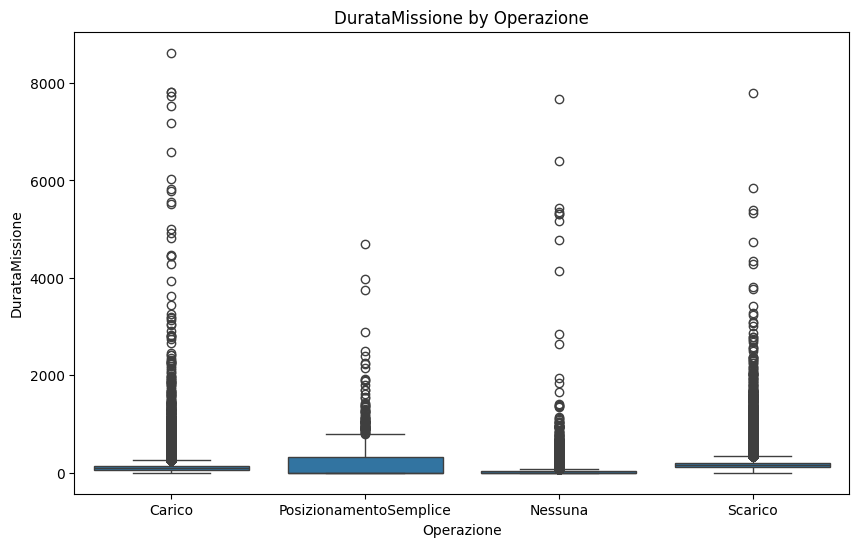

In [7]:
# Exploratory Data Analysis (EDA)

## Summary statistics
print("Summary Statistics:")
print(data.describe())
## Visualizations
### Histogram of 'DurataMissione'
plt.figure(figsize=(10, 6))
sns.histplot(data['DurataMissione'], bins=30, kde=True)
plt.title('Distribution of DurataMissione')
plt.xlabel('DurataMissione')
plt.ylabel('Frequency')
plt.show()

### Boxplot of 'DurataMissione' by 'Operazione'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Operazione', y='DurataMissione', data=data)
plt.title('DurataMissione by Operazione')
plt.xlabel('Operazione')
plt.ylabel('DurataMissione')
plt.show()


In [ ]:
# Feature Engineering

## Create a feature that checks for the delay between 'DataOraInserimento' and 'DataOraInizio'
data_cleaned['Delay_Insertion_to_Start'] = (data_cleaned['DataOraInizio'] - data_cleaned['DataOraInserimento']).dt.total_seconds()  # delay in seconds

# Save the cleaned and engineered dataset
data_cleaned.to_csv('cleaned_hybrid_ae_spc_data.csv', index=False)